In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)

In [2]:
#data is in excel format so, read data as 'read_excel'
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test = pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
print('Training dataset shape:', train.shape)
print('Test dataset shape:', test.shape)

Training dataset shape: (10683, 11)
Test dataset shape: (2671, 10)


In [5]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

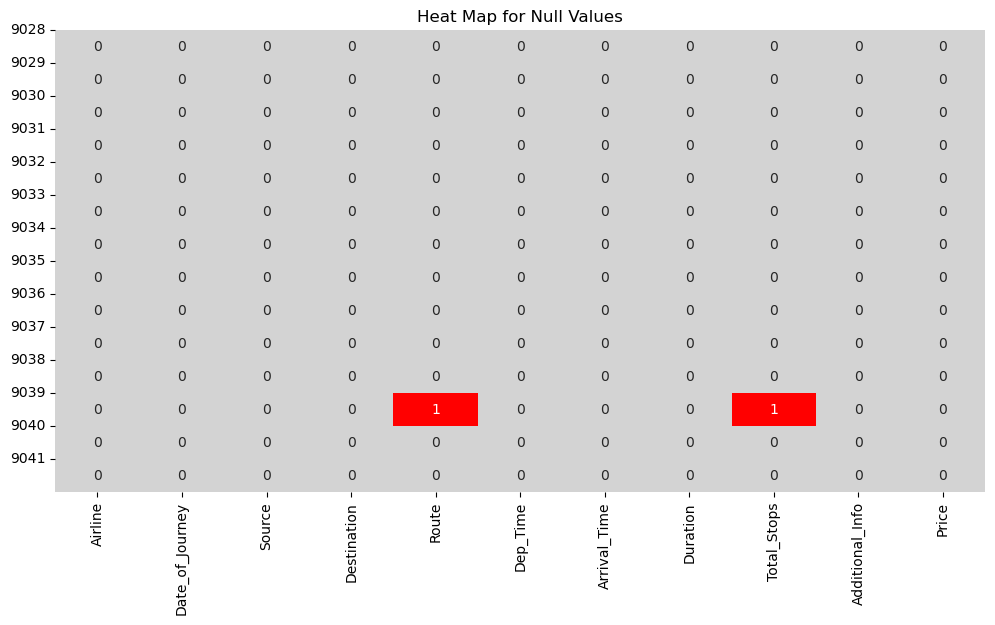

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train'
# Subset the DataFrame for rows 9028 to 9041
subset_df = train.iloc[9028:9042]

# Create a boolean DataFrame indicating missing values
missing_values = subset_df.isnull()

# Create a heatmap using seaborn with annotated values
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values, cmap=['#D3D3D3', '#FF0000'], cbar=False, annot=missing_values.astype(int), fmt='g', vmin=0, vmax=1)

# Set y-axis tick labels to represent rows
plt.yticks(ticks=range(len(subset_df)), labels=subset_df.index)

plt.title('Heat Map for Null Values')
plt.show()


In [6]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train=train.dropna(axis=0, how='any')
#since, there is only one missing value in Total_Stops and Route and both coincidentally are from same record, we can just drop that record/row

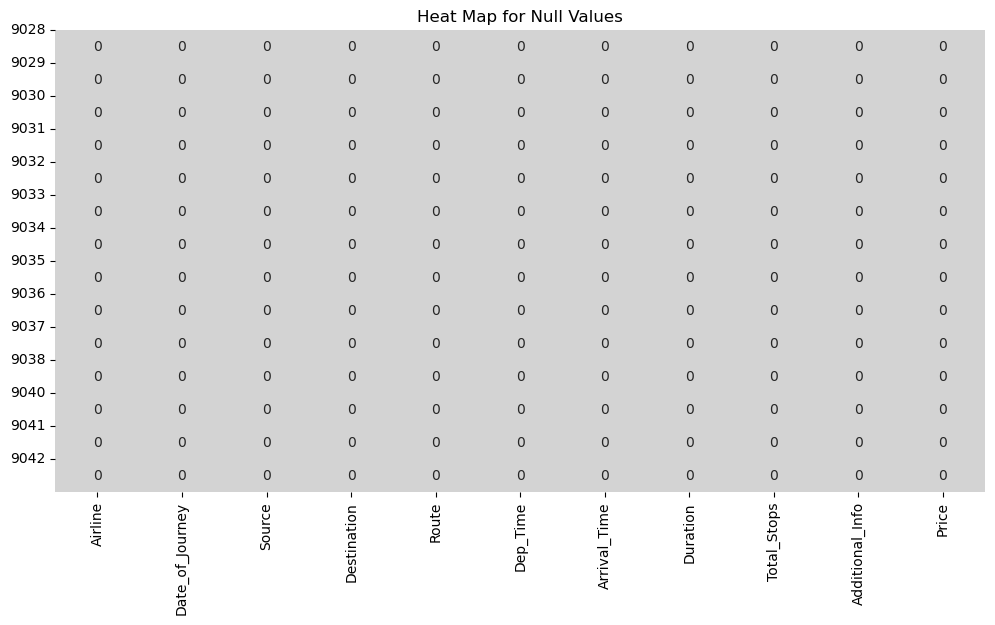

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train'
# Subset the DataFrame for rows 9028 to 9041
subset_df = train.iloc[9028:9042]

# Create a boolean DataFrame indicating missing values
missing_values = subset_df.isnull()

# Create a heatmap using seaborn with annotated values
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values, cmap=['#D3D3D3', '#FF0000'], cbar=False, annot=missing_values.astype(int), fmt='g', vmin=0, vmax=1)

# Set y-axis tick labels to represent rows
plt.yticks(ticks=range(len(subset_df)), labels=subset_df.index)

plt.title('Heat Map for Null Values')
plt.show()


In [9]:
train.shape

(10682, 11)

In [10]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
train.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [12]:
#First we consider Duration column
train["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [13]:
duration_train = list(train["Duration"])

#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters

for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour

In [14]:
duration_train

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [15]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [16]:
train['Duration_hrs'] = duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10682, dtype: int64

In [17]:
train['Duration_mins'] = duration_mins
train['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [18]:
train.drop('Duration', axis=1, inplace=True)

In [19]:
#first we consider 'Date_of_Journey'
train['Day_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day
train['Month_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.month
train.drop('Date_of_Journey', axis = 1, inplace = True)

In [20]:
# Now, we need to take care of Dep_Time
train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time', axis = 1, inplace = True)

C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\2610386234.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\2610386234.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute


In [21]:
#Now, we take care of Arrival_Time
train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\3475674224.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\3475674224.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute


In [22]:
print('Train dataset shape:', train.shape)

Train dataset shape: (10682, 15)


In [23]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [24]:
#Taking care of Airline column
print(train['Airline'].unique())
#print(train['Airline'].nunique())
print(train['Airline'].value_counts())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


In [25]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=train[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


C:\Users\Hemasri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


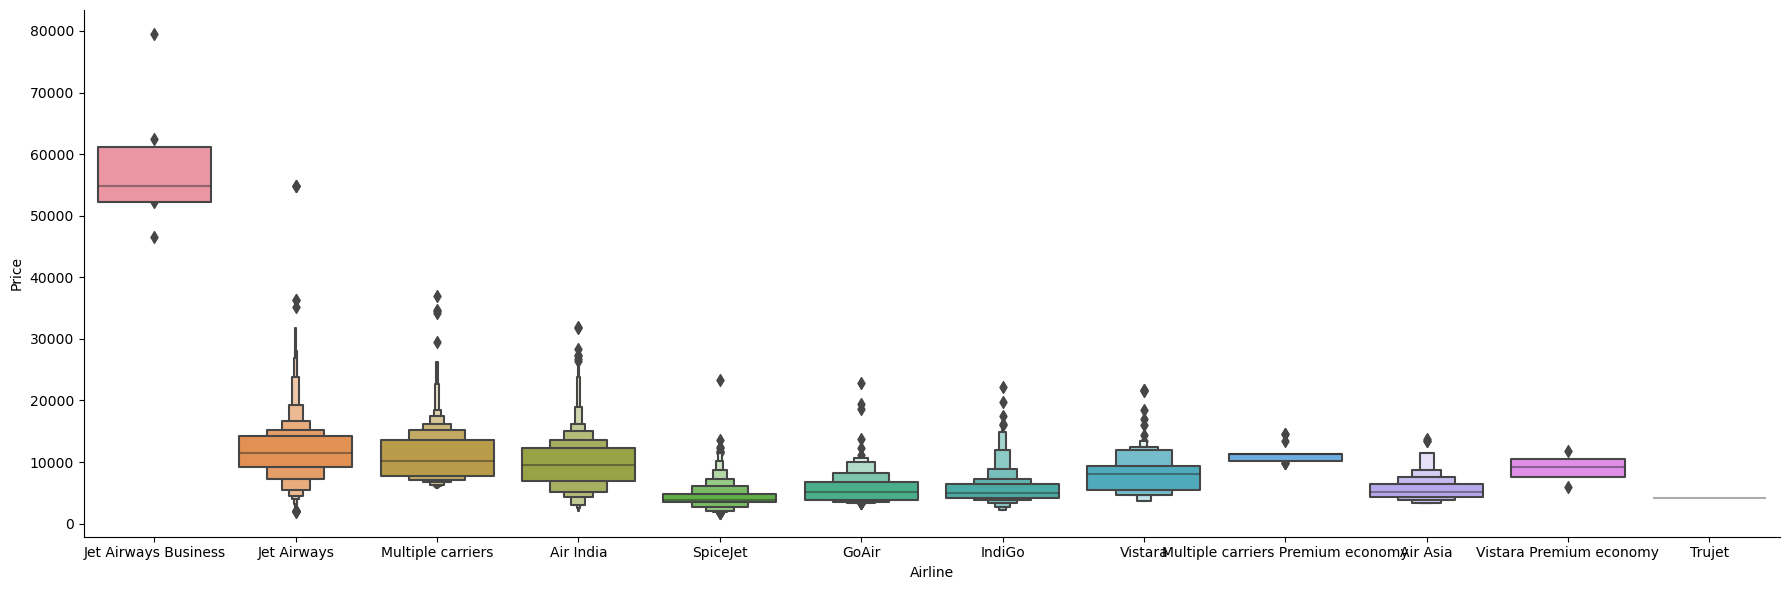

In [133]:
#Taking care of Airline column
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [26]:
Source=train[['Source']]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


C:\Users\Hemasri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


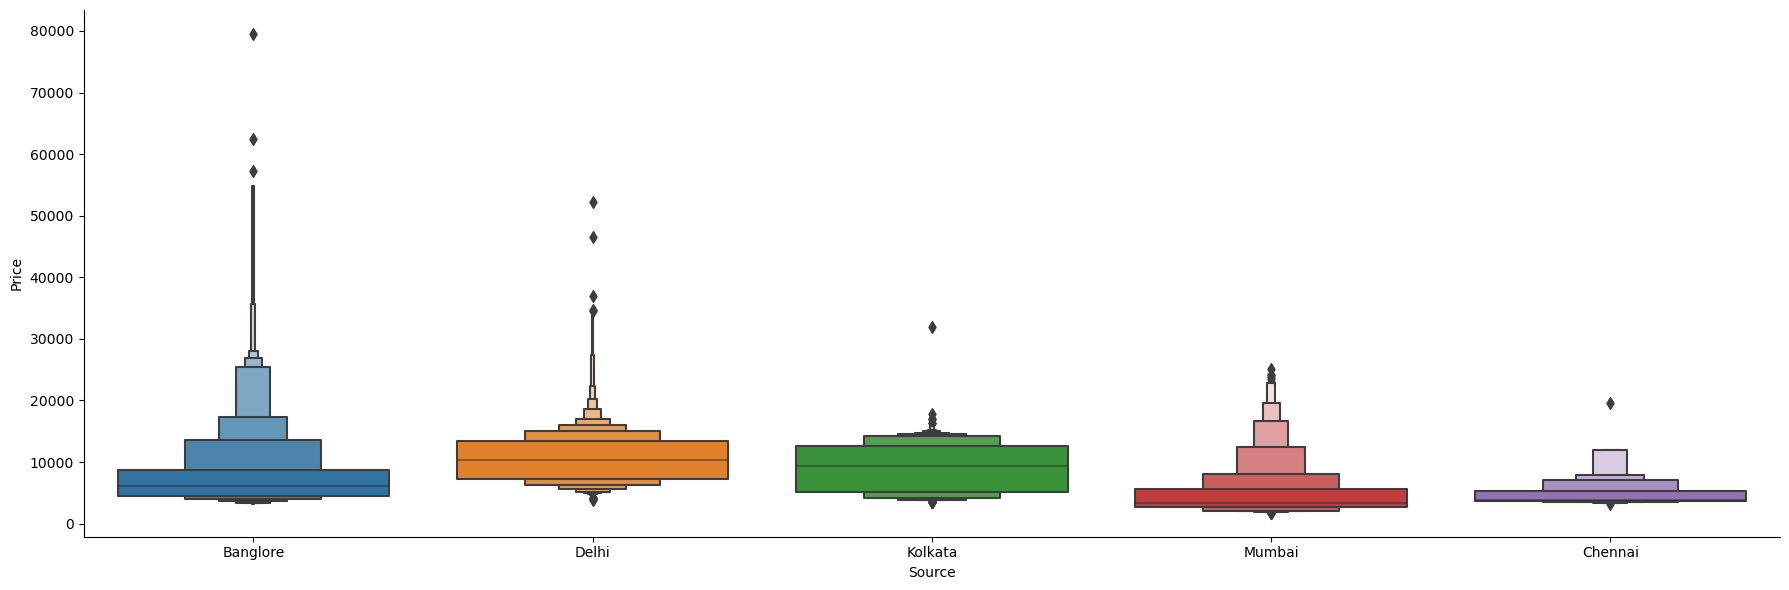

In [135]:
#Taking care of Airline column
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [27]:
Destination=train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


C:\Users\Hemasri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


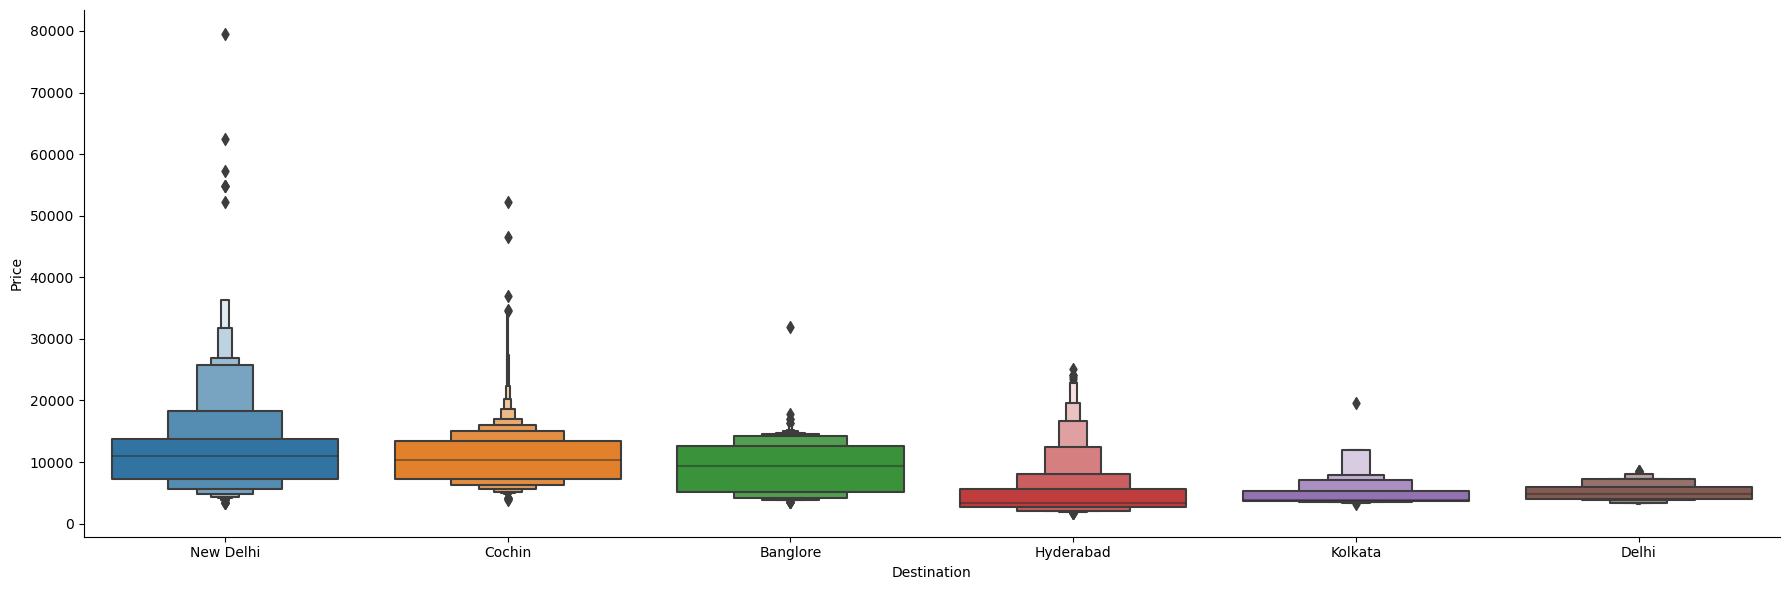

In [137]:
#Taking care of Airline column
sns.catplot(y = "Price", x = "Destination", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

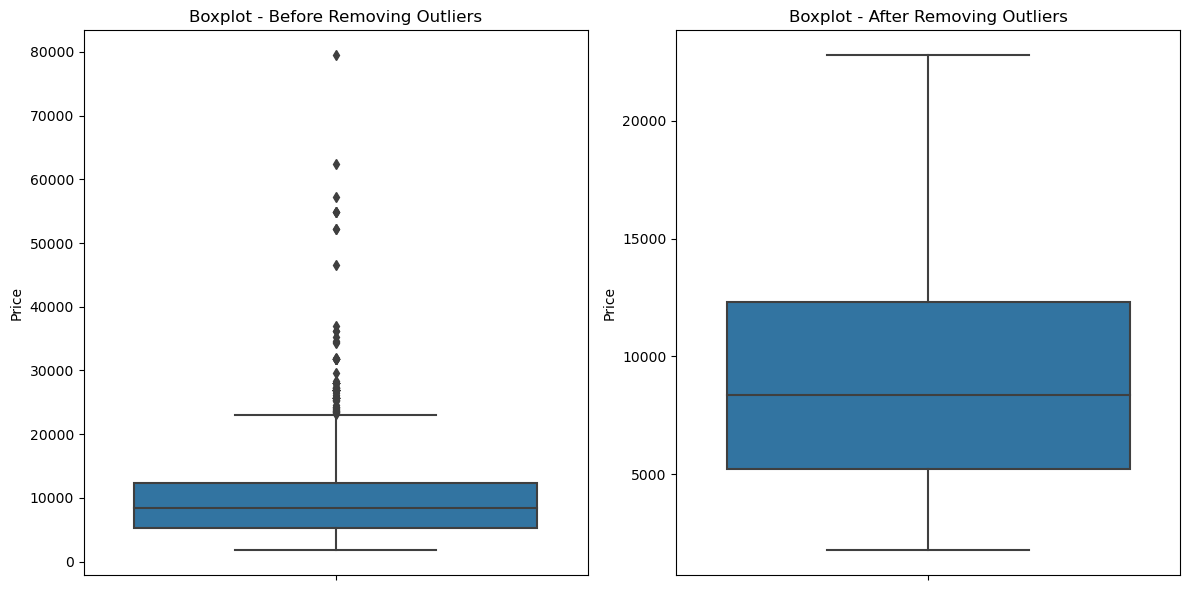

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Price' is the column representing flight fares in your DataFrame
# Replace 'flight_data' and 'Price' with your actual DataFrame and column name
flight_data_before_outliers = train['Price']

# Create a boxplot for flight fares before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Creating a subplot for before outliers
sns.boxplot(y=flight_data_before_outliers)
plt.title('Boxplot - Before Removing Outliers')

# Identify and remove outliers (you can use a method like Z-score or IQR)
# For example, using the Z-score method:
z_scores = (flight_data_before_outliers - flight_data_before_outliers.mean()) / flight_data_before_outliers.std()
flight_data_after_outliers = flight_data_before_outliers[abs(z_scores) < 3]  # Adjust the threshold as needed

# Create a boxplot for flight fares after removing outliers
plt.subplot(1, 2, 2)  # Creating a subplot for after outliers
sns.boxplot(y=flight_data_after_outliers)
plt.title('Boxplot - After Removing Outliers')

plt.tight_layout()
plt.show()

In [28]:
# Concatenate dataset with Airline, Source, Destination, Additional_Info

train = pd.concat([train, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
train.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it

In [29]:
# Replacing Total_Stops
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [30]:
print(train.shape)
train.head()

(10682, 30)


,Total_Stops,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [31]:
test.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [32]:
#First we consider Duration column
test["Duration"].value_counts()

Duration
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: count, Length: 320, dtype: int64

In [33]:
# Converting 'Duration' column into a list
duration_test = list(test["Duration"])

#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))

In [34]:
duration_test

['10h 55m',
 '4h 0m',
 '23h 45m',
 '13h 0m',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h 0m',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h 0m',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h 0m',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h 0m',
 '7h 50m',
 '1h 30m',
 '3h 0m',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m'

In [35]:
test['Duration_hrs'] = duration_hours
test['Duration_hrs']

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hrs, Length: 2671, dtype: int64

In [36]:
test['Duration_mins'] = duration_mins
test['Duration_mins']

0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_mins, Length: 2671, dtype: int64

In [37]:
test.drop('Duration', axis=1, inplace=True)

In [38]:
test['Day_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.day
test['Month_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey', axis = 1, inplace = True)

test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace = True)

test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\239009649.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\239009649.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\239009649.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
C:\Users\Hemasri\AppData\Local\Temp\ipykernel_12408\2

In [39]:
print('Test dataset shape:', test.shape)

Test dataset shape: (2671, 14)


In [40]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=test[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)

Source=test[['Source']]
Source=pd.get_dummies(Source, drop_first= True)

Destination=test[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
test= pd.concat([test, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

(2671, 28)


,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,4,0,12,5,6,20,10,20,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,23,45,21,5,19,15,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,13,0,21,5,8,0,21,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,2,50,24,6,23,55,2,45,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [41]:
train.columns

Index(['Total_Stops', 'Price', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [42]:
test.columns

Index(['Total_Stops', 'Duration_hrs', 'Duration_mins', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [43]:
train.dtypes

Total_Stops                                  int64
Price                                        int64
Duration_hrs                                 int64
Duration_mins                                int64
Day_of_Journey                               int32
Month_of_Journey                             int32
Dep_hr                                       int32
Dep_min                                      int32
Arrival_hr                                   int32
Arrival_min                                  int32
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers                     bool
Airline_Multiple carriers Premium economy     bool
Airline_SpiceJet                              bool
Airline_Trujet                                bool
Airline_Vistara                

In [44]:
price=train.Price
train.drop('Price', axis=1, inplace=True)
train=train.join(price)
train.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3897
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7662
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,13882
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6218
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,13302


In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train=scaler.fit_transform(train)
train[0]

array([-1.22066609, -0.97061397,  1.27904078,  1.23728754, -1.46740227,
        1.65415376, -0.2349499 , -1.80043628, -0.8900139 , -0.44278513,
       -0.13600489,  2.05015058, -0.75053033, -0.02370671, -0.35507822,
       -0.03490678, -0.28797191, -0.00967596, -0.21667251, -0.01676082,
       -0.19231927, -0.85909313, -0.60626609, -0.2642058 , -0.85909313,
       -0.36651266, -0.2642058 , -0.19231927,  3.23440464, -1.12553455])

In [45]:
X = train.loc[:, ['Total_Stops', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [46]:
y = train.iloc[:, -1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

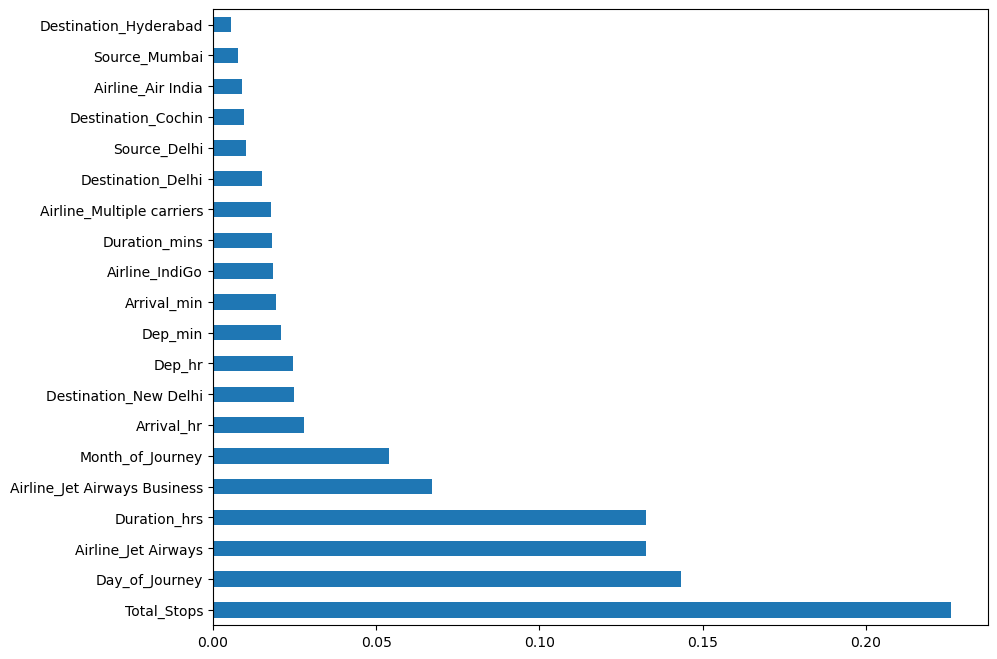

In [47]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [49]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [50]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

print("Linear Regression Score on Training set is",lin_reg.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lin_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lin_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Linear Regression Score on Training set is 0.6322112072126629
Linear Regression Score on Test Set is 0.5888639023134974


C:\Users\Hemasri\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.56348676 0.57670098 0.52740464 0.60808342 0.60919873 0.60086353
 0.58424154 0.63494715 0.61982921 0.75026022 0.64214428 0.60795505
 0.64426589 0.77259566 0.66851263 0.65452934 0.67243843 0.68649251
 0.58903934 0.48634662]
Accuracy: 62.50 %
Standard Deviation: 6.57 %
Mean Absolute Error: 2048.272626605159
Mean Squared Error: 9646558.195863312
RMSE: 3105.890886020195
The r2_score is 0.5888639023134974


Linear Regression Score on Training set is 0.6322112072126629
Linear Regression Score on Test Set is 0.5888639023134974


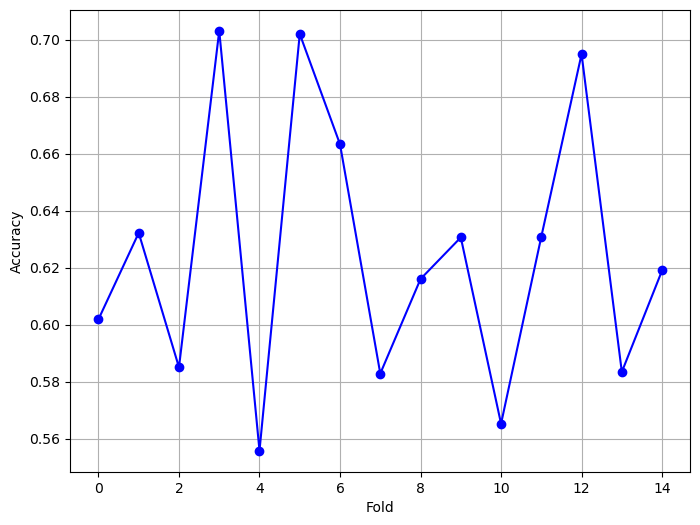

Accuracies for each fold: [0.60183667 0.63217794 0.58499843 0.7031239  0.55572997 0.70199696
 0.66327081 0.58280046 0.61599185 0.63058488 0.56520745 0.63085239
 0.69491716 0.58338389 0.61898618]
Accuracy: 62.44 %
Standard Deviation: 4.66 %
Mean Absolute Error: 2048.272626605159
Mean Squared Error: 9646558.195863312
RMSE: 3105.890886020195
The r2_score is 0.5888639023134974


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Linear Regression Score on Training set is", lin_reg.score(X_train, y_train))  # Training Accuracy
print("Linear Regression Score on Test Set is", lin_reg.score(X_test, y_test))  # Testing Accuracy

# Applying k-fold cross-validation
kfold = KFold(n_splits=15, shuffle=True, random_state=42)
accuracies = cross_val_score(lin_reg, X_train, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

In [52]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Decision Tree Score on Training set is 0.9711683243930616
Decision Tree Score on Test Set is 0.6954008339903984
[0.62869993 0.68886054 0.77385232 0.77047546 0.57913428 0.60404594
 0.62837231 0.77213067 0.70668106 0.61071926 0.77226886 0.74398446
 0.77922418 0.55506612 0.72341208]
Accuracy: 68.91 %
Standard Deviation: 7.79 %
Mean Absolute Error: 1431.794018093901
Mean Squared Error: 7146863.527326601
RMSE: 2673.3618399548163
The r2_score is 0.6954008339903984


Decision Tree Score on Training set is 0.9711683243930616
Decision Tree Score on Test Set is 0.6954008339903984


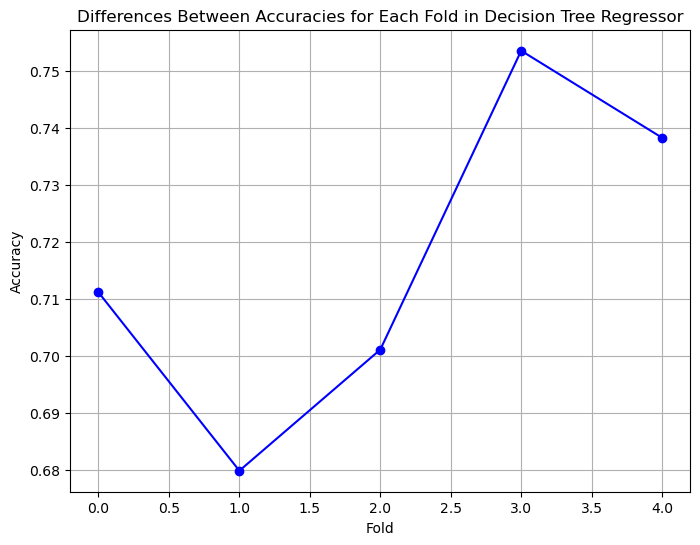

Accuracies for each fold: [0.71120348 0.67989834 0.70114637 0.75359868 0.73832576]
Accuracy: 71.68 %
Standard Deviation: 2.63 %
Mean Absolute Error: 1431.794018093901
Mean Squared Error: 7146863.527326601
RMSE: 2673.3618399548163
The r2_score is 0.6954008339903984


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

print("Decision Tree Score on Training set is", dt_reg.score(X_train, y_train))  # Training Accuracy
print("Decision Tree Score on Test Set is", dt_reg.score(X_test, y_test))  # Testing Accuracy

# Applying k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(dt_reg, X_train, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Decision Tree Regressor')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

knn_reg = KNeighborsRegressor(n_neighbors=50)
knn_reg.fit(X_train, y_train)
y_pred=knn_reg.predict(X_test)

print("KNN Score on Training set is",knn_reg.score(X_train, y_train))#Training Accuracy
print("KNN Score on Test Set is",knn_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(knn_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

KNN Score on Training set is 0.45304542707778805
KNN Score on Test Set is 0.42939168316978793
[0.44162113 0.3650245  0.41425561 0.41184115 0.39787896]
Accuracy: 40.61 %
Standard Deviation: 2.50 %
Mean Absolute Error: 2380.9958446420214
Mean Squared Error: 13388282.776238838
RMSE: 3659.0002427218883
The r2_score is 0.42939168316978793


In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

knn_reg = KNeighborsRegressor(n_neighbors=50)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

accuracies = cross_val_score(knn_reg, X_train, y_train, cv=kfold)
print("Cross-Validation Scores:", accuracies)
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

knn_reg.fit(X_train, y_train)
y_pred=knn_reg.predict(X_test)

print("KNN Score on Training set is",knn_reg.score(X_train, y_train))#Training Accuracy
print("KNN Score on Test Set is",knn_reg.score(X_test, y_test))#Testing Accuracy

mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Cross-Validation Scores: [0.38566038 0.37993074 0.46219399 0.3852246  0.43020227]
Mean Accuracy: 40.86 %
Standard Deviation: 3.24 %
KNN Score on Training set is 0.45304542707778805
KNN Score on Test Set is 0.42939168316978793
Mean Absolute Error: 2380.9958446420214
Mean Squared Error: 13388282.776238838
RMSE: 3659.0002427218883
The r2_score is 0.42939168316978793


Random Forest Score on Training set is 0.8892244898573197
Random Forest Score on Test Set is 0.8220931639195391


C:\Users\Hemasri\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.86337099 0.84982731 0.76978163 0.85602043 0.83860182 0.84889494
 0.77588073 0.84799815 0.83947924 0.70696915 0.83075666 0.8400001
 0.87253143 0.85584916 0.85780469 0.859704   0.85146941 0.84060766
 0.816533   0.74215105]
Accuracy: 82.82 %
Standard Deviation: 4.32 %
Mean Absolute Error: 1212.7535713624798
Mean Squared Error: 4174259.223038839
RMSE: 2043.100394752749
The r2_score is 0.8220931639195391


C:\Users\Hemasri\AppData\Local\Temp\ipykernel_14324\2618861339.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


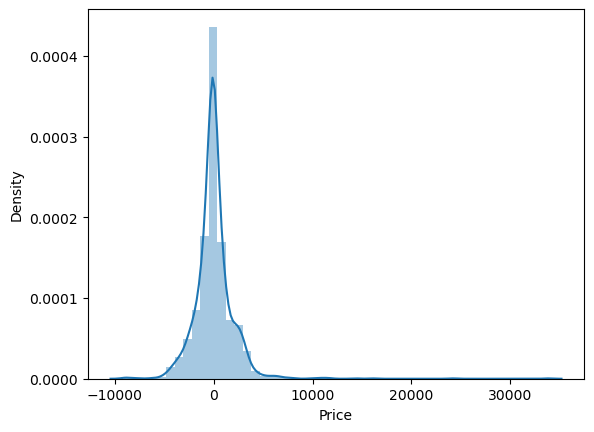

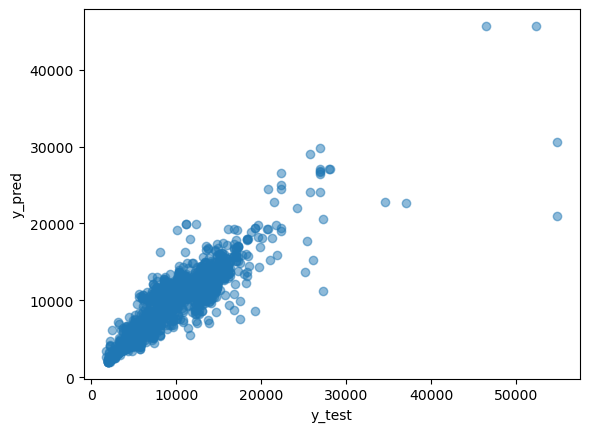

In [53]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Random Forest Score on Training set is 0.8897452093958353
Random Forest Score on Test Set is 0.8227540732811132


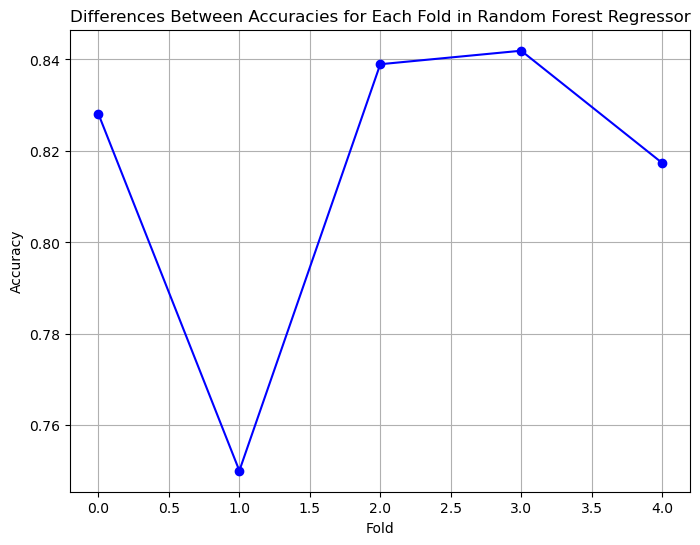

Accuracies for each fold: [0.82805915 0.75008213 0.83895836 0.84190975 0.81738407]
Accuracy: 81.53 %
Standard Deviation: 3.37 %
Mean Absolute Error: 1212.092001426946
Mean Squared Error: 4158752.191049941
RMSE: 2039.3018881592643
The r2_score is 0.8227540732811132


In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print("Random Forest Score on Training set is", rf_reg.score(X_train, y_train))  # Training Accuracy
print("Random Forest Score on Test Set is", rf_reg.score(X_test, y_test))  # Testing Accuracy

# Applying k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(rf_reg, X_train, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Random Forest Regressor')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Error: 1188.8717734147717
Mean Squared Error: 3981125.065535452
Root Mean Squared Error: 1995.2756865995868
R-squared (R2) Score: 0.8303245374554354


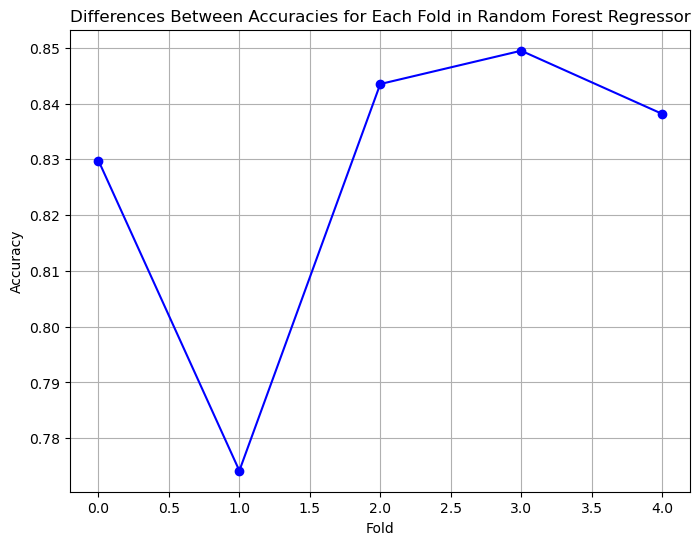

Accuracies for each fold: [0.82978019 0.7741841  0.84350141 0.84947205 0.83815757]
Accuracy: 82.70 %
Standard Deviation: 2.72 %


In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Random Forest Regressor
rf_reg = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='r2', cv=kfold)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

# Plotting the differences between accuracies for each fold
accuracies = cross_val_score(best_model, X_train, y_train, cv=kfold)

plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Random Forest Regressor')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


In [60]:
#Lasso Regressor
from sklearn.linear_model import Lasso
# Initialize the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training set
lasso_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_reg.predict(X_test)


print("Lasso Score on Training set is",lasso_reg.score(X_train, y_train))#Training Accuracy
print("Lasso Tree Score on Test Set is",lasso_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lasso_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Lasso Score on Training set is 0.6322026793804916
Lasso Tree Score on Test Set is 0.5890975956312153
[0.60665462 0.65763986 0.6203654  0.60850243 0.63981055]
Accuracy: 62.66 %
Standard Deviation: 1.95 %
Mean Absolute Error: 2048.2795904754944
Mean Squared Error: 9641075.00866074
RMSE: 3105.008052913992
The r2_score is 0.5890975956312153


Lasso Score on Training set is 0.6322026793804916
Lasso Score on Test Set is 0.5890975956312153


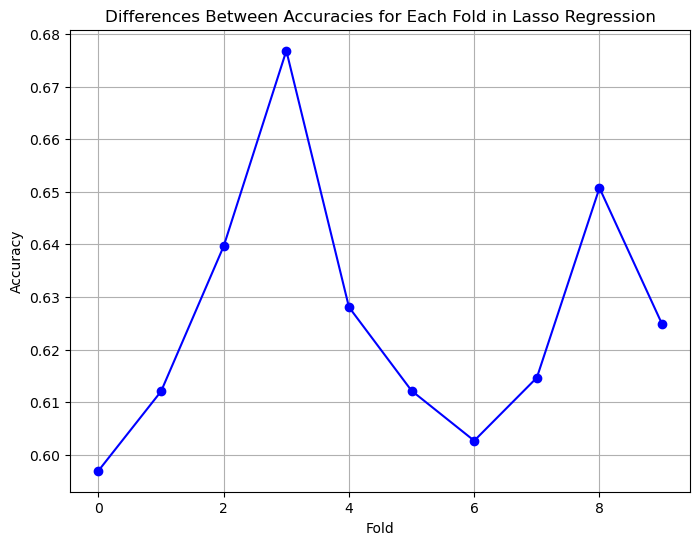

Accuracies for each fold: [0.59696217 0.61205906 0.63967011 0.67682306 0.62806337 0.61216957
 0.60266543 0.61465407 0.65072938 0.62483188]
Accuracy: 62.59 %
Standard Deviation: 2.30 %
Mean Absolute Error: 2048.2795904754944
Mean Squared Error: 9641075.00866074
RMSE: 3105.008052913992
The r2_score is 0.5890975956312153


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

print("Lasso Score on Training set is", lasso_reg.score(X_train, y_train))  # Training Accuracy
print("Lasso Score on Test Set is", lasso_reg.score(X_test, y_test))  # Testing Accuracy

# Applying k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = cross_val_score(lasso_reg, X_train, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Lasso Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))


In [62]:
#Ridge Regressor
from sklearn.linear_model import Ridge
rid_reg =Ridge(random_state = 0)
rid_reg.fit(X_train, y_train)
y_pred=rid_reg.predict(X_test)

print("Ridge Score on Training set is",rid_reg.score(X_train, y_train))#Training Accuracy
print("Ridge Score on Test Set is",rid_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rid_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Ridge Score on Training set is 0.6296371166528973
Ridge Score on Test Set is 0.5966951752013538
[0.59584753 0.61239666 0.61107687 0.6776308  0.63860643 0.61182652
 0.60243765 0.61508865 0.64289361 0.62538294]
Accuracy: 62.33 %
Standard Deviation: 2.29 %
Mean Absolute Error: 2042.8441871127648
Mean Squared Error: 9462811.669869876
RMSE: 3076.1683422514243
The r2_score is 0.5966951752013538


Ridge Score on Training set is 0.6296371166528973
Ridge Score on Test Set is 0.5966951752013538


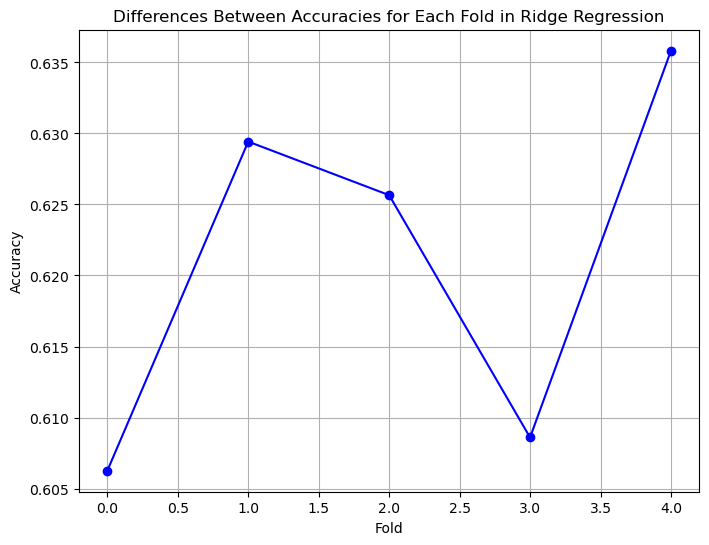

Accuracies for each fold: [0.6062528  0.62942823 0.62565706 0.60859581 0.63582801]
Accuracy: 62.12 %
Standard Deviation: 1.17 %
Mean Absolute Error: 2042.8441871127648
Mean Squared Error: 9462811.669869876
RMSE: 3076.1683422514243
The r2_score is 0.5966951752013538


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test defined

# Ridge Regression
rid_reg = Ridge(random_state=0)
rid_reg.fit(X_train, y_train)
y_pred = rid_reg.predict(X_test)

print("Ridge Score on Training set is", rid_reg.score(X_train, y_train))  # Training Accuracy
print("Ridge Score on Test Set is", rid_reg.score(X_test, y_test))  # Testing Accuracy

# Applying k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(rid_reg, X_train, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Ridge Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies for each fold:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))


In [64]:
#Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Make predictions
# Linear regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
accuracies = cross_val_score(poly_reg, X_train_poly, y_train, cv=kfold)

# Evaluation Metrics
print("Polynomial Regression Results:")
print("R^2 Score on Training set:", poly_reg.score(X_train_poly, y_train))  # Training Accuracy
print("R^2 Score on Test Set:", poly_reg.score(X_test_poly, y_test))  # Testing Accuracy

print("Cross-Validation Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Cross-Validation Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Mean Absolute Error:", mae_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error:", mse_poly)

rmse_poly = np.sqrt(mse_poly)
print('RMSE:', rmse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print('R^2 Score:', r2_poly)

Polynomial Regression Results:
R^2 Score on Training set: 0.7459665057319078
R^2 Score on Test Set: 0.49592022261544133
Cross-Validation Accuracy: -403757843186.01 %
Cross-Validation Standard Deviation: 807515686514.61 %
Mean Absolute Error: 1785.2262130609697
Mean Squared Error: 11827312.014830185
RMSE: 3439.0859272240036
R^2 Score: 0.49592022261544133


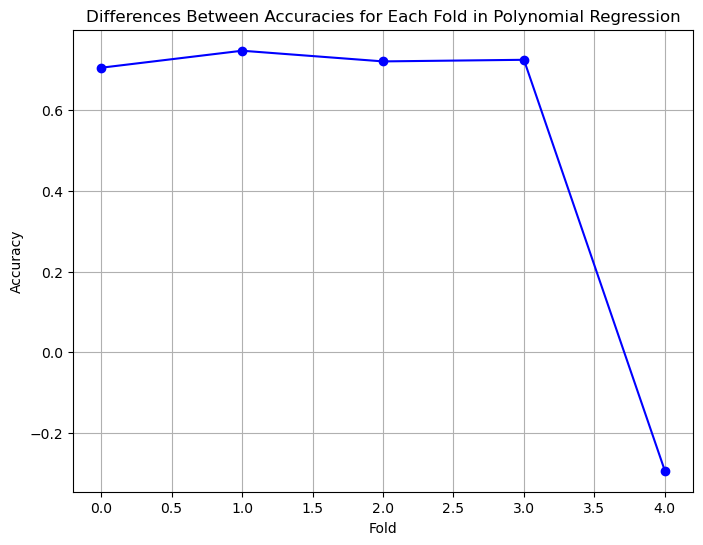

Polynomial Regression Results:
R^2 Score on Training set: 0.7459665057319078
R^2 Score on Test Set: 0.49592022261544133
Cross-Validation Accuracy: 52.07 %
Cross-Validation Standard Deviation: 40.73 %
Mean Absolute Error: 1785.2262130609697
Mean Squared Error: 11827312.014830185
RMSE: 3439.0859272240036
R^2 Score: 0.49592022261544133


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test defined

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Applying k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(poly_reg, X_train_poly, y_train, cv=kfold)

# Plotting the differences between accuracies for each fold
plt.figure(figsize=(8, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Differences Between Accuracies for Each Fold in Polynomial Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Evaluation Metrics
print("Polynomial Regression Results:")
print("R^2 Score on Training set:", poly_reg.score(X_train_poly, y_train))  # Training Accuracy
print("R^2 Score on Test Set:", poly_reg.score(X_test_poly, y_test))  # Testing Accuracy

print("Cross-Validation Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Cross-Validation Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Mean Absolute Error:", mae_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error:", mse_poly)

rmse_poly = np.sqrt(mse_poly)
print('RMSE:', rmse_poly)

r2_poly = r2_score(y_test, y_pred_poly)
print('R^2 Score:', r2_poly)


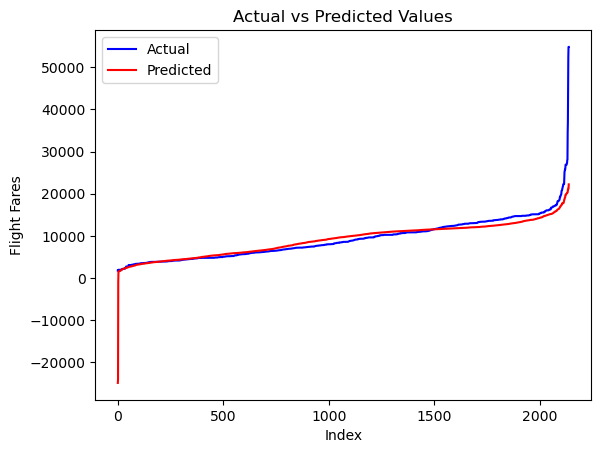

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred_poly are already defined

# Sort the indices to ensure the lines are plotted in order
sorted_indices = np.argsort(y_test)

# Plot the actual values
plt.plot(np.sort(y_test), label='Actual', color='blue')

# Plot the predicted values
plt.plot(np.sort(y_pred_poly), label='Predicted', color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Flight Fares')
plt.legend()
plt.show()


In [226]:
import pickle
# dump information to the file
pickle.dump(rf_reg,open('dep_regg.pkl', 'wb'))
model = pickle.load(open('dep_regg.pkl', 'rb'))

In [227]:
model.predict([[0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

C:\Users\Hemasri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5284.24833219])